__Preamble__

This notebook file is the template for the second term assignment. The assignment is about a dataset that is concerned with insurance claims data from private health insurance. It is synthesized, but somewhat realistic.

__Exercise is due on July 15.__

### Exercise 1: Import the file train.csv and show descriptive statistics for the dataset: What are the marginal distributions of the dependent features and the target variable ("Endkosten").

In [1]:
# import libraries (pandas, numpy, matplotlib, datetime, scipy.stats)
import pandas as pd
import numpy as np
import math
from scipy.stats import skew
from datetime import datetime
import matplotlib.pyplot as plt
from datascience import *
from prob140 import *
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
df = pd.read_csv("train.csv")
df

,Unnamed: 0,ID,Ereignisdatum,Meldedatum,Alter,Geschlecht,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Schadenbeschreibung,Erstreserve,Endkosten
0,6979,WC8607959,2003-12-31T14:00:00Z,2004-01-29T00:00:00Z,21,M,S,0,0,909.351717,P,20.0,4,STRUCK HAMMER BRUISED LEFT LEG,8436.167102,0.000000
1,12975,WC7477367,2000-06-29T08:00:00Z,2000-10-29T00:00:00Z,16,M,S,0,0,635.562035,F,40.0,5,LADDER SLIPPED AND HIT ANKLE SPRAIN LEFT ANKLE,8372.177085,14051.245443
2,19669,WC5586276,1996-10-14T10:00:00Z,1997-04-10T00:00:00Z,37,F,S,0,0,791.829150,F,38.0,5,LIFTING PARCEL STRAIN NECK AND SHOULDERS NECK ...,12023.847580,72608.071751
3,38404,WC9230570,2004-12-31T09:00:00Z,2005-01-10T00:00:00Z,44,M,S,0,0,916.424284,F,38.0,5,MOVING STRAIN LOWER BACK STRAIN,16373.536019,63075.572628
4,45414,WC8670450,2003-02-27T10:00:00Z,2003-11-01T00:00:00Z,54,M,M,0,0,928.223434,F,38.0,5,PARTICLE IN EYE FOREIGN BODY RIGHT EYE,8510.012175,87882.990895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4581,WC7625155,2000-08-10T11:00:00Z,2000-09-05T00:00:00Z,44,F,S,0,0,624.890314,F,38.0,5,CAUGHT FINGER ON SLICING LACERATED LEFT INDEX ...,8467.306246,11246.744272
53996,26554,WC5749419,1996-07-01T08:00:00Z,1996-09-09T00:00:00Z,51,M,U,0,0,419.567395,F,38.0,5,LIFTING FILES STRAINED RIGHT FOREARM LEFT SHOU...,15637.524709,57329.074875
53997,42227,WC7828676,2001-10-26T16:00:00Z,2001-11-02T00:00:00Z,19,M,S,0,0,1153.913092,F,80.0,5,LIFTING BOXES SOFT TISSUE INJURY LEFT FINGER,33208.039396,35137.860624
53998,22181,WC7104649,1999-11-20T12:00:00Z,1999-12-09T00:00:00Z,49,F,M,0,0,409.865077,F,40.0,5,SLICING MEATS RIGHT SHOULDER STRAIN RIGHT SHOU...,8679.542857,65834.700051


__Hint__: Use histograms, box and violin plots as well as a correlation matrix.

In [2]:
df.groupby("Familienstand").count()

,Unnamed: 0,ID,Ereignisdatum,Meldedatum,Alter,Geschlecht,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Schadenbeschreibung,Erstreserve,Endkosten
Familienstand,,,,,,,,,,,,,,,
M,22516,22516,22516,22516,22516,22516,22516,22516,22516,22516,22516,22516,22516,22516,22516
S,26161,26161,26161,26161,26161,26161,26161,26161,26161,26161,26161,26161,26161,26161,26161
U,5294,5294,5294,5294,5294,5294,5294,5294,5294,5294,5294,5294,5294,5294,5294


In [3]:
df.groupby("Geschlecht").count()

,Unnamed: 0,ID,Ereignisdatum,Meldedatum,Alter,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Schadenbeschreibung,Erstreserve,Endkosten
Geschlecht,,,,,,,,,,,,,,,
F,12338,12338,12338,12338,12338,12332,12338,12338,12338,12338,12338,12338,12338,12338,12338
M,41660,41660,41660,41660,41660,41637,41660,41660,41660,41660,41660,41660,41660,41660,41660
U,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


### Variable Age

In [4]:
tab=pd.crosstab(index=df['Alter'], columns='count')
tab/tab.sum()

col_0,count
Alter,
13,0.000167
14,0.000630
15,0.002926
16,0.009611
17,0.019593
...,...
76,0.000074
78,0.000037
79,0.000037


Text(0.5, 1.0, 'Variable Age Box Plot')

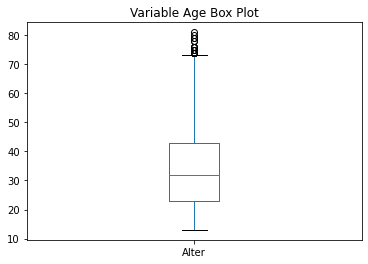

In [5]:
#Check the normality of the distribution of 'Age' by Box Plot
df['Alter'].plot(kind='box')
plt.title('Variable Age Box Plot')

Text(0.5, 1.0, 'Variable Age distribution')

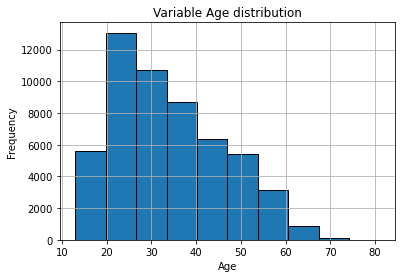

In [6]:
#Check the normality of 'Age' by histogramme
df['Alter'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Variable Age distribution')

In [8]:
#Calculate the skewness of data set along the axis 'Age'
skew(df['Alter'])

0.5363262304858885

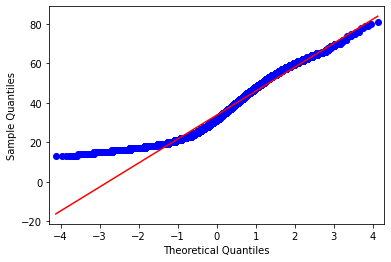

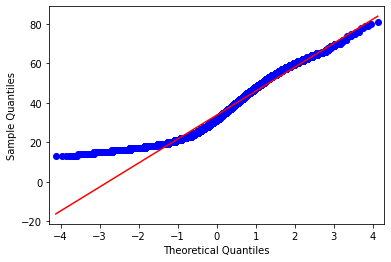

In [9]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df['Alter'], line='s')

In [10]:
df.corr()

,Unnamed: 0,Alter,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitwoche,ArbeitstageWoche,Erstreserve,Endkosten
Unnamed: 0,1.000000,0.004429,-0.002706,0.002636,-0.000463,-0.003344,-0.000122,0.007395,0.002732
Alter,0.004429,1.000000,0.064209,0.037479,0.176073,0.017311,0.031966,0.114698,0.094529
Kinder,-0.002706,0.064209,1.000000,0.197231,0.100953,0.035952,0.012861,0.044017,0.026052
AndereHausstandsmitglieder,0.002636,0.037479,0.197231,1.000000,0.057868,0.009795,0.004481,0.045100,0.018420
LohnWoche,-0.000463,0.176073,0.100953,0.057868,1.000000,0.175349,0.206063,0.181381,0.129040
Arbeitszeitwoche,-0.003344,0.017311,0.035952,0.009795,0.175349,1.000000,0.399353,0.008122,0.012556
ArbeitstageWoche,-0.000122,0.031966,0.012861,0.004481,0.206063,0.399353,1.000000,0.007574,0.010414
Erstreserve,0.007395,0.114698,0.044017,0.045100,0.181381,0.008122,0.007574,1.000000,0.286252
Endkosten,0.002732,0.094529,0.026052,0.018420,0.129040,0.012556,0.010414,0.286252,1.000000


In [12]:
emp_dist(df["Alter"])

Value,Proportion
13,0.000166667
14,0.00062963
15,0.00292593
16,0.00961111
17,0.0195926
18,0.0321481
19,0.039037
20,0.0367963
21,0.037463
22,0.0365926


In [13]:
df['Alter'].mean()

33.84237037037037

In [14]:
df['Alter'].std()

12.122164581389205

In [15]:
skew(df['Endkosten'])

12.596936247531547

In [16]:
df['Alter'].median()

32.0

### Exercise 2: The primary target variable is `Endkosten`. Build a regression model that estimates `Endkosten` from the dependent variables. Use the __root mean square measure__ to test the performance. Try to get close to $rmse < 1$.

__Hint__: Standardize the numerical variables to $[-1,1]$ first and take the logarithmic transformation of the target variable.

### Standardize the numerical variables to [−1,1]  

In [17]:
type(df['Alter'][1])

numpy.int64

In [18]:
columns=['Alter', 'Kinder', 'AndereHausstandsmitglieder',
       'LohnWoche', 'Arbeitszeitwoche',
       'ArbeitstageWoche', 'Erstreserve', 'Endkosten']
def maximum_absolute_scaling(df):
    # copy the dataframe
    df_scaled = df.copy()
    # apply maximum absolute scaling
    for column in columns:
        df_scaled[column] = (df_scaled[column]-df_scaled[column].min())  / (df_scaled[column].max()-df_scaled[column].min())
    return df_scaled
    
# call the maximum_absolute_scaling function
df_scaled = maximum_absolute_scaling(df)

df_scaled


,Unnamed: 0,ID,Ereignisdatum,Meldedatum,Alter,Geschlecht,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Schadenbeschreibung,Erstreserve,Endkosten
0,6979,WC8607959,2003-12-31T14:00:00Z,2004-01-29T00:00:00Z,0.117647,M,S,0.0,0.0,0.069540,P,0.031250,0.500000,STRUCK HAMMER BRUISED LEFT LEG,0.001854,0.000000
1,12975,WC7477367,2000-06-29T08:00:00Z,2000-10-29T00:00:00Z,0.044118,M,S,0.0,0.0,0.033161,F,0.062500,0.666667,LADDER SLIPPED AND HIT ANKLE SPRAIN LEFT ANKLE,0.001822,0.003480
2,19669,WC5586276,1996-10-14T10:00:00Z,1997-04-10T00:00:00Z,0.352941,F,S,0.0,0.0,0.053925,F,0.059375,0.666667,LIFTING PARCEL STRAIN NECK AND SHOULDERS NECK ...,0.003644,0.017985
3,38404,WC9230570,2004-12-31T09:00:00Z,2005-01-10T00:00:00Z,0.455882,M,S,0.0,0.0,0.070480,F,0.059375,0.666667,MOVING STRAIN LOWER BACK STRAIN,0.005815,0.015623
4,45414,WC8670450,2003-02-27T10:00:00Z,2003-11-01T00:00:00Z,0.602941,M,M,0.0,0.0,0.072048,F,0.059375,0.666667,PARTICLE IN EYE FOREIGN BODY RIGHT EYE,0.001891,0.021768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4581,WC7625155,2000-08-10T11:00:00Z,2000-09-05T00:00:00Z,0.455882,F,S,0.0,0.0,0.031743,F,0.059375,0.666667,CAUGHT FINGER ON SLICING LACERATED LEFT INDEX ...,0.001870,0.002786
53996,26554,WC5749419,1996-07-01T08:00:00Z,1996-09-09T00:00:00Z,0.558824,M,U,0.0,0.0,0.004462,F,0.059375,0.666667,LIFTING FILES STRAINED RIGHT FOREARM LEFT SHOU...,0.005447,0.014200
53997,42227,WC7828676,2001-10-26T16:00:00Z,2001-11-02T00:00:00Z,0.088235,M,S,0.0,0.0,0.102035,F,0.125000,0.666667,LIFTING BOXES SOFT TISSUE INJURY LEFT FINGER,0.014214,0.008703
53998,22181,WC7104649,1999-11-20T12:00:00Z,1999-12-09T00:00:00Z,0.529412,F,M,0.0,0.0,0.003173,F,0.062500,0.666667,SLICING MEATS RIGHT SHOULDER STRAIN RIGHT SHOU...,0.001976,0.016307


### log transformation

In [19]:
df_scaled['Endkosten_log']=df_scaled['Endkosten'].apply(lambda x:np.sqrt(x))
df_scaled

,Unnamed: 0,ID,Ereignisdatum,Meldedatum,Alter,Geschlecht,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Schadenbeschreibung,Erstreserve,Endkosten,Endkosten_log
0,6979,WC8607959,2003-12-31T14:00:00Z,2004-01-29T00:00:00Z,0.117647,M,S,0.0,0.0,0.069540,P,0.031250,0.500000,STRUCK HAMMER BRUISED LEFT LEG,0.001854,0.000000,0.000000
1,12975,WC7477367,2000-06-29T08:00:00Z,2000-10-29T00:00:00Z,0.044118,M,S,0.0,0.0,0.033161,F,0.062500,0.666667,LADDER SLIPPED AND HIT ANKLE SPRAIN LEFT ANKLE,0.001822,0.003480,0.058995
2,19669,WC5586276,1996-10-14T10:00:00Z,1997-04-10T00:00:00Z,0.352941,F,S,0.0,0.0,0.053925,F,0.059375,0.666667,LIFTING PARCEL STRAIN NECK AND SHOULDERS NECK ...,0.003644,0.017985,0.134106
3,38404,WC9230570,2004-12-31T09:00:00Z,2005-01-10T00:00:00Z,0.455882,M,S,0.0,0.0,0.070480,F,0.059375,0.666667,MOVING STRAIN LOWER BACK STRAIN,0.005815,0.015623,0.124994
4,45414,WC8670450,2003-02-27T10:00:00Z,2003-11-01T00:00:00Z,0.602941,M,M,0.0,0.0,0.072048,F,0.059375,0.666667,PARTICLE IN EYE FOREIGN BODY RIGHT EYE,0.001891,0.021768,0.147540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4581,WC7625155,2000-08-10T11:00:00Z,2000-09-05T00:00:00Z,0.455882,F,S,0.0,0.0,0.031743,F,0.059375,0.666667,CAUGHT FINGER ON SLICING LACERATED LEFT INDEX ...,0.001870,0.002786,0.052780
53996,26554,WC5749419,1996-07-01T08:00:00Z,1996-09-09T00:00:00Z,0.558824,M,U,0.0,0.0,0.004462,F,0.059375,0.666667,LIFTING FILES STRAINED RIGHT FOREARM LEFT SHOU...,0.005447,0.014200,0.119164
53997,42227,WC7828676,2001-10-26T16:00:00Z,2001-11-02T00:00:00Z,0.088235,M,S,0.0,0.0,0.102035,F,0.125000,0.666667,LIFTING BOXES SOFT TISSUE INJURY LEFT FINGER,0.014214,0.008703,0.093292
53998,22181,WC7104649,1999-11-20T12:00:00Z,1999-12-09T00:00:00Z,0.529412,F,M,0.0,0.0,0.003173,F,0.062500,0.666667,SLICING MEATS RIGHT SHOULDER STRAIN RIGHT SHOU...,0.001976,0.016307,0.127698


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


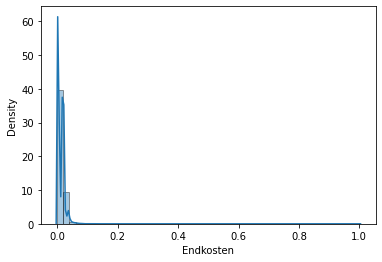

<Figure size 432x288 with 0 Axes>

In [20]:

sns.distplot(df_scaled['Endkosten'])
fig = plt.figure()

In [21]:
skew(df_scaled['Endkosten'])

12.596936247531547

In [22]:
skew(df_scaled['Endkosten_log'])

0.705155714707089

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


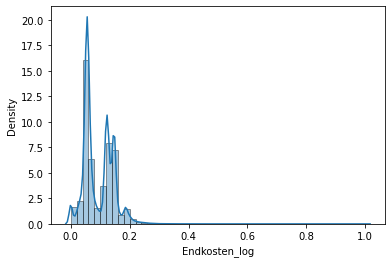

<Figure size 432x288 with 0 Axes>

In [23]:
sns.distplot(df_scaled['Endkosten_log'])
fig = plt.figure()

In [24]:
from sklearn.linear_model import LinearRegression
Y = df_scaled.pop("Endkosten_log")
X = df_scaled.drop(["ID", "Ereignisdatum","Meldedatum", "Geschlecht","Familienstand","Arbeitszeitkategorie", "Schadenbeschreibung" ], axis=1)
model = LinearRegression().fit(X, Y)
r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8350530392946883


In [25]:
from sklearn.metrics import mean_squared_error
Y_predicted = model.predict(X)
rmse = mean_squared_error(Y, Y_predicted, squared=True)
rmse

0.00040744802783407536

### Exercise 3: The insurance company's policy states that any claim above 25.000 is a "major claim". It would be very helpful to know in advance, judging from the initial claims report data (as obtained from train.csv), if a claim will be major. Train a classification model that differentiates between minor and major claims (from "Endkosten") with good accuracy (precision > 0.85). Ignore the description column "Schadenbeschreibung" for now.

__Hint__: Make sure to split the dataset into training and test sets to check for overfitting. Pick a classifier that is robust to imbalanced datasets, as major claims are, by definition, rare.

### Training and test set

In [26]:
df2=pd.read_csv("train.csv")
df2

,Unnamed: 0,ID,Ereignisdatum,Meldedatum,Alter,Geschlecht,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Schadenbeschreibung,Erstreserve,Endkosten
0,6979,WC8607959,2003-12-31T14:00:00Z,2004-01-29T00:00:00Z,21,M,S,0,0,909.351717,P,20.0,4,STRUCK HAMMER BRUISED LEFT LEG,8436.167102,0.000000
1,12975,WC7477367,2000-06-29T08:00:00Z,2000-10-29T00:00:00Z,16,M,S,0,0,635.562035,F,40.0,5,LADDER SLIPPED AND HIT ANKLE SPRAIN LEFT ANKLE,8372.177085,14051.245443
2,19669,WC5586276,1996-10-14T10:00:00Z,1997-04-10T00:00:00Z,37,F,S,0,0,791.829150,F,38.0,5,LIFTING PARCEL STRAIN NECK AND SHOULDERS NECK ...,12023.847580,72608.071751
3,38404,WC9230570,2004-12-31T09:00:00Z,2005-01-10T00:00:00Z,44,M,S,0,0,916.424284,F,38.0,5,MOVING STRAIN LOWER BACK STRAIN,16373.536019,63075.572628
4,45414,WC8670450,2003-02-27T10:00:00Z,2003-11-01T00:00:00Z,54,M,M,0,0,928.223434,F,38.0,5,PARTICLE IN EYE FOREIGN BODY RIGHT EYE,8510.012175,87882.990895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4581,WC7625155,2000-08-10T11:00:00Z,2000-09-05T00:00:00Z,44,F,S,0,0,624.890314,F,38.0,5,CAUGHT FINGER ON SLICING LACERATED LEFT INDEX ...,8467.306246,11246.744272
53996,26554,WC5749419,1996-07-01T08:00:00Z,1996-09-09T00:00:00Z,51,M,U,0,0,419.567395,F,38.0,5,LIFTING FILES STRAINED RIGHT FOREARM LEFT SHOU...,15637.524709,57329.074875
53997,42227,WC7828676,2001-10-26T16:00:00Z,2001-11-02T00:00:00Z,19,M,S,0,0,1153.913092,F,80.0,5,LIFTING BOXES SOFT TISSUE INJURY LEFT FINGER,33208.039396,35137.860624
53998,22181,WC7104649,1999-11-20T12:00:00Z,1999-12-09T00:00:00Z,49,F,M,0,0,409.865077,F,40.0,5,SLICING MEATS RIGHT SHOULDER STRAIN RIGHT SHOU...,8679.542857,65834.700051


In [27]:
def condition1(s):
    if (s['Geschlecht'] == "M"):
        return 0
    if (s['Geschlecht'] == "F"):
        return 1
    else:
        return 2
    
def conditions(s):
    if (s['Endkosten'] > 25000):
        return "Major"
    else:
        return "Minor"
    
def conditions2(s):
    if (s['Familienstand'] == "S"):
        return 0
    if (s['Familienstand'] == "M"):
        return 1
    else:
        return 3

def conditions3(s):
    if (s['Arbeitszeitkategorie'] == "P"):
        return 0
    else:
        return 1
    
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1))

In [28]:
df2["Geschlecht_categ"]=df2.apply(condition1,axis=1)
df2['class'] = df2.apply(conditions, axis=1)
df2['Familienstand_categ'] = df2.apply(conditions2, axis=1)
df2['Arbeitszeitkategorie_categ'] = df2.apply(conditions3, axis=1)

In [29]:
columns=['Alter', 'Kinder', 'AndereHausstandsmitglieder',
       'LohnWoche', 'Arbeitszeitwoche',
       'ArbeitstageWoche', 'Erstreserve', 'Geschlecht_categ', 'Familienstand_categ', 'Familienstand_categ','Arbeitszeitkategorie_categ' ]
def maximum_absolute_scaling(df):
    # copy the dataframe
    df_scaled2 = df2.copy()
    # apply maximum absolute scaling
    for column in columns:
        df_scaled2[column] = (df_scaled2[column]-df_scaled2[column].min())  / (df_scaled2[column].max()-df_scaled2[column].min())
    return df_scaled2
    
# call the maximum_absolute_scaling function
df_scaled2 = maximum_absolute_scaling(df2)

df_scaled2

,Unnamed: 0,ID,Ereignisdatum,Meldedatum,Alter,Geschlecht,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Schadenbeschreibung,Erstreserve,Endkosten,Geschlecht_categ,class,Familienstand_categ,Arbeitszeitkategorie_categ
0,6979,WC8607959,2003-12-31T14:00:00Z,2004-01-29T00:00:00Z,0.117647,M,S,0.0,0.0,0.069540,P,0.031250,0.500000,STRUCK HAMMER BRUISED LEFT LEG,0.001854,0.000000,0.0,Minor,0.000000,0.0
1,12975,WC7477367,2000-06-29T08:00:00Z,2000-10-29T00:00:00Z,0.044118,M,S,0.0,0.0,0.033161,F,0.062500,0.666667,LADDER SLIPPED AND HIT ANKLE SPRAIN LEFT ANKLE,0.001822,14051.245443,0.0,Minor,0.000000,1.0
2,19669,WC5586276,1996-10-14T10:00:00Z,1997-04-10T00:00:00Z,0.352941,F,S,0.0,0.0,0.053925,F,0.059375,0.666667,LIFTING PARCEL STRAIN NECK AND SHOULDERS NECK ...,0.003644,72608.071751,0.5,Major,0.000000,1.0
3,38404,WC9230570,2004-12-31T09:00:00Z,2005-01-10T00:00:00Z,0.455882,M,S,0.0,0.0,0.070480,F,0.059375,0.666667,MOVING STRAIN LOWER BACK STRAIN,0.005815,63075.572628,0.0,Major,0.000000,1.0
4,45414,WC8670450,2003-02-27T10:00:00Z,2003-11-01T00:00:00Z,0.602941,M,M,0.0,0.0,0.072048,F,0.059375,0.666667,PARTICLE IN EYE FOREIGN BODY RIGHT EYE,0.001891,87882.990895,0.0,Major,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4581,WC7625155,2000-08-10T11:00:00Z,2000-09-05T00:00:00Z,0.455882,F,S,0.0,0.0,0.031743,F,0.059375,0.666667,CAUGHT FINGER ON SLICING LACERATED LEFT INDEX ...,0.001870,11246.744272,0.5,Minor,0.000000,1.0
53996,26554,WC5749419,1996-07-01T08:00:00Z,1996-09-09T00:00:00Z,0.558824,M,U,0.0,0.0,0.004462,F,0.059375,0.666667,LIFTING FILES STRAINED RIGHT FOREARM LEFT SHOU...,0.005447,57329.074875,0.0,Major,1.000000,1.0
53997,42227,WC7828676,2001-10-26T16:00:00Z,2001-11-02T00:00:00Z,0.088235,M,S,0.0,0.0,0.102035,F,0.125000,0.666667,LIFTING BOXES SOFT TISSUE INJURY LEFT FINGER,0.014214,35137.860624,0.0,Major,0.000000,1.0
53998,22181,WC7104649,1999-11-20T12:00:00Z,1999-12-09T00:00:00Z,0.529412,F,M,0.0,0.0,0.003173,F,0.062500,0.666667,SLICING MEATS RIGHT SHOULDER STRAIN RIGHT SHOU...,0.001976,65834.700051,0.5,Major,0.333333,1.0


In [30]:
df2

,Unnamed: 0,ID,Ereignisdatum,Meldedatum,Alter,Geschlecht,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Schadenbeschreibung,Erstreserve,Endkosten,Geschlecht_categ,class,Familienstand_categ,Arbeitszeitkategorie_categ
0,6979,WC8607959,2003-12-31T14:00:00Z,2004-01-29T00:00:00Z,21,M,S,0,0,909.351717,P,20.0,4,STRUCK HAMMER BRUISED LEFT LEG,8436.167102,0.000000,0,Minor,0,0
1,12975,WC7477367,2000-06-29T08:00:00Z,2000-10-29T00:00:00Z,16,M,S,0,0,635.562035,F,40.0,5,LADDER SLIPPED AND HIT ANKLE SPRAIN LEFT ANKLE,8372.177085,14051.245443,0,Minor,0,1
2,19669,WC5586276,1996-10-14T10:00:00Z,1997-04-10T00:00:00Z,37,F,S,0,0,791.829150,F,38.0,5,LIFTING PARCEL STRAIN NECK AND SHOULDERS NECK ...,12023.847580,72608.071751,1,Major,0,1
3,38404,WC9230570,2004-12-31T09:00:00Z,2005-01-10T00:00:00Z,44,M,S,0,0,916.424284,F,38.0,5,MOVING STRAIN LOWER BACK STRAIN,16373.536019,63075.572628,0,Major,0,1
4,45414,WC8670450,2003-02-27T10:00:00Z,2003-11-01T00:00:00Z,54,M,M,0,0,928.223434,F,38.0,5,PARTICLE IN EYE FOREIGN BODY RIGHT EYE,8510.012175,87882.990895,0,Major,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4581,WC7625155,2000-08-10T11:00:00Z,2000-09-05T00:00:00Z,44,F,S,0,0,624.890314,F,38.0,5,CAUGHT FINGER ON SLICING LACERATED LEFT INDEX ...,8467.306246,11246.744272,1,Minor,0,1
53996,26554,WC5749419,1996-07-01T08:00:00Z,1996-09-09T00:00:00Z,51,M,U,0,0,419.567395,F,38.0,5,LIFTING FILES STRAINED RIGHT FOREARM LEFT SHOU...,15637.524709,57329.074875,0,Major,3,1
53997,42227,WC7828676,2001-10-26T16:00:00Z,2001-11-02T00:00:00Z,19,M,S,0,0,1153.913092,F,80.0,5,LIFTING BOXES SOFT TISSUE INJURY LEFT FINGER,33208.039396,35137.860624,0,Major,0,1
53998,22181,WC7104649,1999-11-20T12:00:00Z,1999-12-09T00:00:00Z,49,F,M,0,0,409.865077,F,40.0,5,SLICING MEATS RIGHT SHOULDER STRAIN RIGHT SHOU...,8679.542857,65834.700051,1,Major,1,1


In [31]:
from sklearn.model_selection import train_test_split
Y = df_scaled2.pop("class")
X = df_scaled2

X_train,X_test,Y_train,Y_test = train_test_split(X.index,Y,test_size=0.2)
#X.iloc[X_train] # return dataframe train
X.iloc[X_train].to_csv(r'C:\Users\T\Desktop\Big Data\X_train.csv',index=False)
Y_train.to_csv(r'C:\Users\T\Desktop\Big Data\Y_train.csv',index=False)
X.iloc[X_test].to_csv(r'C:\Users\T\Desktop\Big Data\X_test.csv',index=False)
Y_test.to_csv(r'C:\Users\T\Desktop\Big Data\Y_test.csv',index=False)

In [32]:
pwd

'C:\\Users\\T\\python\\Assignment 2'

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
X=pd.read_csv('X_train.csv')
Xprime=X.drop(["ID", "Ereignisdatum","Meldedatum", "Geschlecht","Familienstand","Arbeitszeitkategorie", "Schadenbeschreibung","Endkosten"], axis=1)
Y=pd.read_csv('Y_train.csv')
Yprime=np.ravel(Y)
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(Xprime, Yprime)


In [ ]:
Xtest=pd.read_csv('X_test.csv')
#Xtest_prime=Xtest.drop(["ID", "Ereignisdatum","Meldedatum", "Geschlecht","Familienstand","Arbeitszeitkategorie", "Schadenbeschreibung"], axis=1)
Xtest_prime=Xtest.drop(["ID", "Ereignisdatum","Meldedatum", "Geschlecht","Familienstand","Arbeitszeitkategorie", "Schadenbeschreibung","Endkosten"], axis=1)
Y_pred = clf.predict(Xtest_prime)


In [ ]:
Y_test.shape

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

### Exercise 4: The company wants to test another approach that uses the hypothesis that only the 1% largest claims should be consired major claims. Train a new classifier that is based on the segmentation of claims into major claims based on the 99% threshold.

__Hint__: Pay special attention to the imbalance of classes in the dataset.

### Exercise 5: Improve your models from exercise 3/4 making use of the description column `Schadenbeschreibung`. A good model should give a score > 0.9, excellent models exhibit scores > 0.95.

__Hint__: Use data mining techniques that count, cluster and segment words. Start by making a word cloud and consider using a word-vector or a Latent Dirichlet Allocation method to generate improved input features.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

In [33]:
# define model
model = DecisionTreeClassifier()
scores = cross_validate(model, Xprime, Yprime, cv=100, n_jobs=-1, scoring="f1_macro")
model.fit(Xprime, Yprime)

DecisionTreeClassifier()

In [30]:
scores

{'fit_time': array([0.72442627, 0.72442627, 0.84099936, 0.94207191, 0.74745345,
        0.75719428, 0.69225121, 0.71448708, 0.64913058, 0.67731166,
        0.77806687, 0.75928497, 0.72556186, 0.67630076, 0.73541212,
        0.70627594, 0.72805262, 0.71905375, 0.73621225, 0.70420957]),
 'score_time': array([0.0320065 , 0.0240047 , 0.02027321, 0.02016163, 0.02015066,
        0.01812148, 0.01212335, 0.018152  , 0.02018189, 0.02015829,
        0.02018142, 0.02016234, 0.02017665, 0.01813865, 0.02000189,
        0.01799965, 0.02100086, 0.01900125, 0.01900172, 0.02000213]),
 'test_score': array([0.56773433, 0.57160482, 0.56841158, 0.56169884, 0.58919291,
        0.55317927, 0.57490218, 0.56748543, 0.56773433, 0.58083659,
        0.57457555, 0.56457138, 0.59004924, 0.5814664 , 0.5764869 ,
        0.57240795, 0.59505001, 0.56230101, 0.56485911, 0.57562793])}

In [34]:
Xtest=pd.read_csv('X_test.csv')
#Xtest_prime=Xtest.drop(["ID", "Ereignisdatum","Meldedatum", "Geschlecht","Familienstand","Arbeitszeitkategorie", "Schadenbeschreibung"], axis=1)
Xtest_prime=Xtest.drop(["ID", "Ereignisdatum","Meldedatum", "Geschlecht","Familienstand","Arbeitszeitkategorie", "Schadenbeschreibung","Endkosten"], axis=1)
Y_pred = model.predict(Xtest_prime)

In [35]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.5784259259259259


In [36]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [79]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [117]:
df=pd.read_csv("train.csv")
df

,Unnamed: 0,ID,Ereignisdatum,Meldedatum,Alter,Geschlecht,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Schadenbeschreibung,Erstreserve,Endkosten
0,6979,WC8607959,2003-12-31T14:00:00Z,2004-01-29T00:00:00Z,21,M,S,0,0,909.351717,P,20.0,4,STRUCK HAMMER BRUISED LEFT LEG,8436.167102,0.000000
1,12975,WC7477367,2000-06-29T08:00:00Z,2000-10-29T00:00:00Z,16,M,S,0,0,635.562035,F,40.0,5,LADDER SLIPPED AND HIT ANKLE SPRAIN LEFT ANKLE,8372.177085,14051.245443
2,19669,WC5586276,1996-10-14T10:00:00Z,1997-04-10T00:00:00Z,37,F,S,0,0,791.829150,F,38.0,5,LIFTING PARCEL STRAIN NECK AND SHOULDERS NECK ...,12023.847580,72608.071751
3,38404,WC9230570,2004-12-31T09:00:00Z,2005-01-10T00:00:00Z,44,M,S,0,0,916.424284,F,38.0,5,MOVING STRAIN LOWER BACK STRAIN,16373.536019,63075.572628
4,45414,WC8670450,2003-02-27T10:00:00Z,2003-11-01T00:00:00Z,54,M,M,0,0,928.223434,F,38.0,5,PARTICLE IN EYE FOREIGN BODY RIGHT EYE,8510.012175,87882.990895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4581,WC7625155,2000-08-10T11:00:00Z,2000-09-05T00:00:00Z,44,F,S,0,0,624.890314,F,38.0,5,CAUGHT FINGER ON SLICING LACERATED LEFT INDEX ...,8467.306246,11246.744272
53996,26554,WC5749419,1996-07-01T08:00:00Z,1996-09-09T00:00:00Z,51,M,U,0,0,419.567395,F,38.0,5,LIFTING FILES STRAINED RIGHT FOREARM LEFT SHOU...,15637.524709,57329.074875
53997,42227,WC7828676,2001-10-26T16:00:00Z,2001-11-02T00:00:00Z,19,M,S,0,0,1153.913092,F,80.0,5,LIFTING BOXES SOFT TISSUE INJURY LEFT FINGER,33208.039396,35137.860624
53998,22181,WC7104649,1999-11-20T12:00:00Z,1999-12-09T00:00:00Z,49,F,M,0,0,409.865077,F,40.0,5,SLICING MEATS RIGHT SHOULDER STRAIN RIGHT SHOU...,8679.542857,65834.700051


In [118]:
df.drop('ID',axis='columns', inplace=True)
df.dtypes

Unnamed: 0                      int64
Ereignisdatum                  object
Meldedatum                     object
Alter                           int64
Geschlecht                     object
Familienstand                  object
Kinder                          int64
AndereHausstandsmitglieder      int64
LohnWoche                     float64
Arbeitszeitkategorie           object
Arbeitszeitwoche              float64
ArbeitstageWoche                int64
Schadenbeschreibung            object
Erstreserve                   float64
Endkosten                     float64
dtype: object

In [119]:
df['dat1']=df['Ereignisdatum'].str[:10].apply(lambda x: pd.to_datetime(x))
df['dat2']=df['Meldedatum'].str[:10].apply(lambda x: pd.to_datetime(x))
df['waiting']=df['dat2']-df['dat1']

In [120]:
df

,Unnamed: 0,Ereignisdatum,Meldedatum,Alter,Geschlecht,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Schadenbeschreibung,Erstreserve,Endkosten,dat1,dat2,waiting
0,6979,2003-12-31T14:00:00Z,2004-01-29T00:00:00Z,21,M,S,0,0,909.351717,P,20.0,4,STRUCK HAMMER BRUISED LEFT LEG,8436.167102,0.000000,2003-12-31,2004-01-29,29 days
1,12975,2000-06-29T08:00:00Z,2000-10-29T00:00:00Z,16,M,S,0,0,635.562035,F,40.0,5,LADDER SLIPPED AND HIT ANKLE SPRAIN LEFT ANKLE,8372.177085,14051.245443,2000-06-29,2000-10-29,122 days
2,19669,1996-10-14T10:00:00Z,1997-04-10T00:00:00Z,37,F,S,0,0,791.829150,F,38.0,5,LIFTING PARCEL STRAIN NECK AND SHOULDERS NECK ...,12023.847580,72608.071751,1996-10-14,1997-04-10,178 days
3,38404,2004-12-31T09:00:00Z,2005-01-10T00:00:00Z,44,M,S,0,0,916.424284,F,38.0,5,MOVING STRAIN LOWER BACK STRAIN,16373.536019,63075.572628,2004-12-31,2005-01-10,10 days
4,45414,2003-02-27T10:00:00Z,2003-11-01T00:00:00Z,54,M,M,0,0,928.223434,F,38.0,5,PARTICLE IN EYE FOREIGN BODY RIGHT EYE,8510.012175,87882.990895,2003-02-27,2003-11-01,247 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4581,2000-08-10T11:00:00Z,2000-09-05T00:00:00Z,44,F,S,0,0,624.890314,F,38.0,5,CAUGHT FINGER ON SLICING LACERATED LEFT INDEX ...,8467.306246,11246.744272,2000-08-10,2000-09-05,26 days
53996,26554,1996-07-01T08:00:00Z,1996-09-09T00:00:00Z,51,M,U,0,0,419.567395,F,38.0,5,LIFTING FILES STRAINED RIGHT FOREARM LEFT SHOU...,15637.524709,57329.074875,1996-07-01,1996-09-09,70 days
53997,42227,2001-10-26T16:00:00Z,2001-11-02T00:00:00Z,19,M,S,0,0,1153.913092,F,80.0,5,LIFTING BOXES SOFT TISSUE INJURY LEFT FINGER,33208.039396,35137.860624,2001-10-26,2001-11-02,7 days
53998,22181,1999-11-20T12:00:00Z,1999-12-09T00:00:00Z,49,F,M,0,0,409.865077,F,40.0,5,SLICING MEATS RIGHT SHOULDER STRAIN RIGHT SHOU...,8679.542857,65834.700051,1999-11-20,1999-12-09,19 days


In [121]:
df.dtypes

Unnamed: 0                              int64
Ereignisdatum                          object
Meldedatum                             object
Alter                                   int64
Geschlecht                             object
Familienstand                          object
Kinder                                  int64
AndereHausstandsmitglieder              int64
LohnWoche                             float64
Arbeitszeitkategorie                   object
Arbeitszeitwoche                      float64
ArbeitstageWoche                        int64
Schadenbeschreibung                    object
Erstreserve                           float64
Endkosten                             float64
dat1                           datetime64[ns]
dat2                           datetime64[ns]
waiting                       timedelta64[ns]
dtype: object

In [122]:
df.drop('Ereignisdatum',axis='columns', inplace=True)
df.drop('Meldedatum',axis='columns', inplace=True)
df.drop('Schadenbeschreibung',axis='columns', inplace=True)
df.drop('dat1',axis='columns', inplace=True)
df.drop('dat2',axis='columns', inplace=True)

In [123]:
df.dtypes

Unnamed: 0                              int64
Alter                                   int64
Geschlecht                             object
Familienstand                          object
Kinder                                  int64
AndereHausstandsmitglieder              int64
LohnWoche                             float64
Arbeitszeitkategorie                   object
Arbeitszeitwoche                      float64
ArbeitstageWoche                        int64
Erstreserve                           float64
Endkosten                             float64
waiting                       timedelta64[ns]
dtype: object

In [124]:
for column in df:
    print(f'{column} : {df[column].unique()}')

Unnamed: 0 : [ 6979 12975 19669 ... 42227 22181  7426]
Alter : [21 16 37 44 54 40 51 25 20 28 58 41 19 48 27 18 47 59 32 22 60 46 34 43
 17 42 49 35 31 52 57 45 33 39 64 30 24 23 38 15 26 55 36 61 50 62 29 53
 65 56 69 74 78 66 67 63 70 68 14 79 73 13 71 81 72 75 76 80]
Geschlecht : ['M' 'F' 'U']
Familienstand : ['S' 'M' 'U' nan]
Kinder : [0 1 3 2 4 5 6 9 8]
AndereHausstandsmitglieder : [0 1 2 3 5]
LohnWoche : [ 909.35171666  635.56203464  791.82914985 ... 1153.91309211  409.86507662
  827.43435582]
Arbeitszeitkategorie : ['P' 'F']
Arbeitszeitwoche : [ 20.    40.    38.    30.    84.    61.    48.    25.    35.    54.
  24.    26.    18.    50.    12.5    9.    31.4   27.    45.    28.
  70.    60.    55.    58.    31.    41.    36.    37.5   15.    17.
  12.25  41.5   32.5   50.8   33.    56.    66.    52.     7.5    8.
  44.    34.    29.    26.5   83.    42.    29.75   9.02  42.65  39.
  27.5   13.    22.    15.71  38.5   23.    44.58  10.    45.4   21.
  39.58  47.5   76.    32.   

In [127]:
#df['Geschlecht'].replace({'M':0,'F':1, 'U':2}, inplace=True)
df['Familienstand'].replace({'S':0,'M':1, 'U':2, 'nan' :3}, inplace=True)
#df['Arbeitszeitkategorie'].replace({'P':0,'F':1}, inplace=True)

In [128]:
df

,Unnamed: 0,Alter,Geschlecht,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Erstreserve,Endkosten,waiting
0,6979,21,0,0.0,0,0,909.351717,P,20.0,4,8436.167102,0.000000,29 days
1,12975,16,0,0.0,0,0,635.562035,F,40.0,5,8372.177085,14051.245443,122 days
2,19669,37,1,0.0,0,0,791.829150,F,38.0,5,12023.847580,72608.071751,178 days
3,38404,44,0,0.0,0,0,916.424284,F,38.0,5,16373.536019,63075.572628,10 days
4,45414,54,0,1.0,0,0,928.223434,F,38.0,5,8510.012175,87882.990895,247 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4581,44,1,0.0,0,0,624.890314,F,38.0,5,8467.306246,11246.744272,26 days
53996,26554,51,0,2.0,0,0,419.567395,F,38.0,5,15637.524709,57329.074875,70 days
53997,42227,19,0,0.0,0,0,1153.913092,F,80.0,5,33208.039396,35137.860624,7 days
53998,22181,49,1,1.0,0,0,409.865077,F,40.0,5,8679.542857,65834.700051,19 days


In [129]:
def conditions(s):
    if (s['Endkosten'] > 25000):
        return "Major"
    else:
        return "Minor"

In [130]:
df['class'] = df.apply(conditions, axis=1)

In [131]:
df

,Unnamed: 0,Alter,Geschlecht,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Erstreserve,Endkosten,waiting,class
0,6979,21,0,0.0,0,0,909.351717,P,20.0,4,8436.167102,0.000000,29 days,Minor
1,12975,16,0,0.0,0,0,635.562035,F,40.0,5,8372.177085,14051.245443,122 days,Minor
2,19669,37,1,0.0,0,0,791.829150,F,38.0,5,12023.847580,72608.071751,178 days,Major
3,38404,44,0,0.0,0,0,916.424284,F,38.0,5,16373.536019,63075.572628,10 days,Major
4,45414,54,0,1.0,0,0,928.223434,F,38.0,5,8510.012175,87882.990895,247 days,Major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4581,44,1,0.0,0,0,624.890314,F,38.0,5,8467.306246,11246.744272,26 days,Minor
53996,26554,51,0,2.0,0,0,419.567395,F,38.0,5,15637.524709,57329.074875,70 days,Major
53997,42227,19,0,0.0,0,0,1153.913092,F,80.0,5,33208.039396,35137.860624,7 days,Major
53998,22181,49,1,1.0,0,0,409.865077,F,40.0,5,8679.542857,65834.700051,19 days,Major


In [132]:
df['waiting']=df['waiting'].str[:10]

AttributeError: Can only use .str accessor with string values!

In [133]:
cols_to_scale=['Alter','LohnWoche','Arbeitszeitwoche','Arbeitszeitwoche','ArbeitstageWoche','Erstreserve']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [134]:
df

,Unnamed: 0,Alter,Geschlecht,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Erstreserve,Endkosten,waiting,class
0,6979,0.117647,0,0.0,0,0,0.069540,P,0.031250,0.500000,0.001854,0.000000,29 days,Minor
1,12975,0.044118,0,0.0,0,0,0.033161,F,0.062500,0.666667,0.001822,14051.245443,122 days,Minor
2,19669,0.352941,1,0.0,0,0,0.053925,F,0.059375,0.666667,0.003644,72608.071751,178 days,Major
3,38404,0.455882,0,0.0,0,0,0.070480,F,0.059375,0.666667,0.005815,63075.572628,10 days,Major
4,45414,0.602941,0,1.0,0,0,0.072048,F,0.059375,0.666667,0.001891,87882.990895,247 days,Major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4581,0.455882,1,0.0,0,0,0.031743,F,0.059375,0.666667,0.001870,11246.744272,26 days,Minor
53996,26554,0.558824,0,2.0,0,0,0.004462,F,0.059375,0.666667,0.005447,57329.074875,70 days,Major
53997,42227,0.088235,0,0.0,0,0,0.102035,F,0.125000,0.666667,0.014214,35137.860624,7 days,Major
53998,22181,0.529412,1,1.0,0,0,0.003173,F,0.062500,0.666667,0.001976,65834.700051,19 days,Major


In [135]:
#df.drop('waiting',axis='columns', inplace=True)
df.drop('Endkosten',axis='columns', inplace=True)

In [136]:
df

,Unnamed: 0,Alter,Geschlecht,Familienstand,Kinder,AndereHausstandsmitglieder,LohnWoche,Arbeitszeitkategorie,Arbeitszeitwoche,ArbeitstageWoche,Erstreserve,waiting,class
0,6979,0.117647,0,0.0,0,0,0.069540,P,0.031250,0.500000,0.001854,29 days,Minor
1,12975,0.044118,0,0.0,0,0,0.033161,F,0.062500,0.666667,0.001822,122 days,Minor
2,19669,0.352941,1,0.0,0,0,0.053925,F,0.059375,0.666667,0.003644,178 days,Major
3,38404,0.455882,0,0.0,0,0,0.070480,F,0.059375,0.666667,0.005815,10 days,Major
4,45414,0.602941,0,1.0,0,0,0.072048,F,0.059375,0.666667,0.001891,247 days,Major
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4581,0.455882,1,0.0,0,0,0.031743,F,0.059375,0.666667,0.001870,26 days,Minor
53996,26554,0.558824,0,2.0,0,0,0.004462,F,0.059375,0.666667,0.005447,70 days,Major
53997,42227,0.088235,0,0.0,0,0,0.102035,F,0.125000,0.666667,0.014214,7 days,Major
53998,22181,0.529412,1,1.0,0,0,0.003173,F,0.062500,0.666667,0.001976,19 days,Major


In [106]:
df.dtypes

Unnamed: 0                      int64
Alter                         float64
Geschlecht                      int64
Familienstand                 float64
Kinder                          int64
AndereHausstandsmitglieder      int64
LohnWoche                     float64
Arbeitszeitkategorie            int64
Arbeitszeitwoche              float64
ArbeitstageWoche              float64
Erstreserve                   float64
class                          object
dtype: object

In [144]:
X = df.drop('class',axis='columns')
y = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [138]:
X_train.shape

(43200, 12)

In [139]:
X_test.shape

(10800, 12)

In [140]:
len(X_train.columns)

12

In [141]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [108]:
X_train.dtypes

Unnamed: 0                      int64
Alter                         float64
Geschlecht                      int64
Familienstand                 float64
Kinder                          int64
AndereHausstandsmitglieder      int64
LohnWoche                     float64
Arbeitszeitkategorie            int64
Arbeitszeitwoche              float64
ArbeitstageWoche              float64
Erstreserve                   float64
dtype: object

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

In [145]:
# define model
model = DecisionTreeClassifier()
scores = cross_validate(model, X_train, y_train, cv=20, n_jobs=-1, scoring="f1_macro")
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'F'

In [111]:
for column in df:
    print(f'{column} : {df[column].unique()}')

Unnamed: 0 : [ 6979 12975 19669 ... 42227 22181  7426]
Alter : [0.11764706 0.04411765 0.35294118 0.45588235 0.60294118 0.39705882
 0.55882353 0.17647059 0.10294118 0.22058824 0.66176471 0.41176471
 0.08823529 0.51470588 0.20588235 0.07352941 0.5        0.67647059
 0.27941176 0.13235294 0.69117647 0.48529412 0.30882353 0.44117647
 0.05882353 0.42647059 0.52941176 0.32352941 0.26470588 0.57352941
 0.64705882 0.47058824 0.29411765 0.38235294 0.75       0.25
 0.16176471 0.14705882 0.36764706 0.02941176 0.19117647 0.61764706
 0.33823529 0.70588235 0.54411765 0.72058824 0.23529412 0.58823529
 0.76470588 0.63235294 0.82352941 0.89705882 0.95588235 0.77941176
 0.79411765 0.73529412 0.83823529 0.80882353 0.01470588 0.97058824
 0.88235294 0.         0.85294118 1.         0.86764706 0.91176471
 0.92647059 0.98529412]
Geschlecht : [0 1 2]
Familienstand : [ 0.  1.  2. nan]
Kinder : [0 1 3 2 4 5 6 9 8]
AndereHausstandsmitglieder : [0 1 2 3 5]
LohnWoche : [0.06953999 0.03316121 0.05392462 ... 0.10203

In [1]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined